In [1]:
import os,time,sys
import matplotlib.pyplot as plt 
import numpy as np
from charon import propa
import charon.physicsconstants as PC
pc = PC.PhysicsConstants()
from ipynb.fs.full.func_plot_histo import plot_projections, plot_2DHist
import random as rd
import physt as phy

In [20]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 15,
        }

In [16]:
data = np.load('Burnsample/OscNext_Level7_v02.00_burnsample_2020_pass2_variables_NoCut.pkl',allow_pickle=True, encoding="latin1")

In [3]:
burnsample = data['burnsample']

In [4]:
burnsample.keys()

dict_keys(['PID', 'NFiles', 'MJD_time', 'Accumulated_time', 'runid', 'reco_CascadeEnergy', 'reco_TrackEnergy', 'reco_TotalEnergy', 'reco_Zenith', 'reco_Azimuth', 'reco_Dec', 'reco_RA', 'reco_psi', 'L4OscNext_bool', 'L4muon_classifier_all', 'L4noise_classifier', 'L5nHit_DOMs', 'L7OscNext_bool', 'L7muon_classifier_all', 'L7muon_classifier_up', 'L7reco_vertex_z', 'L7reco_vertex_rho36', 'L7_ntop15', 'L7_nouter', 'L7reco_time', 'L7coincident_muon_bool', 'L7data_quality_cut', 'L7containment_cut'])

In [5]:
def psi_f(RA,decl):
    return np.arccos(np.cos(np.pi/2.-(-29.0078*np.pi/180))*np.cos(np.pi/2.-decl)\
                      +np.sin(np.pi/2.-(-29.0078*np.pi/180))*np.sin(np.pi/2.-decl)*\
                       np.cos(RA-266.4168*np.pi/180))

In [6]:
# 2D table (E, psi)
# 1st step : reco_Dec - associer 10 randoms RA et calculer les psi - increase psi statistics but not E stats
# 1st bis : vérifie que Ra, dec -> psi (vérifier que fonction ok)
# 2nd step : plot background PDF

In [7]:
DEC_reco = burnsample['reco_Dec']
RA_reco = burnsample['reco_RA']
psi_reco = burnsample['reco_psi']
E_reco = burnsample['reco_TotalEnergy']

In [8]:
for i in range(1):
    psi = psi_f(RA_reco[i], DEC_reco[i])
    print('psi computed = {0} ; psi_reco = {1} \n'.format(psi, psi_reco[i]))

psi computed = 2.7251981640916982 ; psi_reco = 2.725196713406548 



In [9]:
RA_random_oversample = []
DEC_oversample = []
E_reco_oversample = []

for i in range(len(DEC_reco)):
    for j in range(10):
        RA_random_oversample.append(rd.randint(0,360))
        DEC_oversample.append(DEC_reco[i])
        E_reco_oversample.append(E_reco[i])
        
E_reco_oversample = np.array(E_reco_oversample)

RA_random = []

for i in range(len(DEC_reco)):
    RA_random.append(rd.randint(0,360))

(array([0.04319528, 0.10607449, 0.15665124, 0.22417804, 0.27475479,
        0.30756134, 0.35759131, 0.37126071, 0.41254227, 0.43085926,
        0.42730522, 0.4636658 , 0.48690377, 0.48553683, 0.51014174,
        0.47897552, 0.51205545, 0.47159405, 0.47870213, 0.43195281,
        0.38110267, 0.34720257, 0.31494281, 0.30072664, 0.25042327,
        0.21488285, 0.16567304, 0.11591645, 0.07026068, 0.02515168]),
 array([0.00664227, 0.11061631, 0.21459036, 0.31856441, 0.42253845,
        0.5265125 , 0.63048655, 0.7344606 , 0.83843464, 0.94240869,
        1.04638274, 1.15035679, 1.25433083, 1.35830488, 1.46227893,
        1.56625297, 1.67022702, 1.77420107, 1.87817512, 1.98214916,
        2.08612321, 2.19009726, 2.2940713 , 2.39804535, 2.5020194 ,
        2.60599345, 2.70996749, 2.81394154, 2.91791559, 3.02188964,
        3.12586368]),
 [<matplotlib.patches.Polygon at 0x7fd7dbf7bd60>])

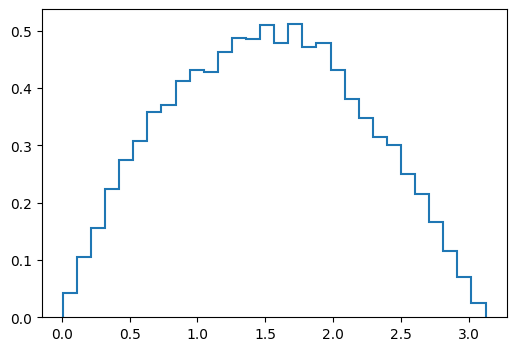

In [10]:
psi_scrambled = []

for i in range(len(RA_random_oversample)):
    psi_scrambled.append(psi_f(RA_random_oversample[i], DEC_oversample[i]))

plt.figure(figsize=(6,4))
plt.hist(psi_scrambled, bins=30, density=True, histtype = 'step' , linewidth = 1.5)


psi_scrambled = []

for i in range(len(RA_random)):
    psi_scrambled.append(psi_f(RA_random[i], DEC_reco[i]))

plt.figure(figsize=(6,4))
plt.hist(psi_scrambled, bins=35, density=True)

In [11]:
psi_scrambled = np.array(psi_scrambled)
Transpose = psi_scrambled[:,None]
Background = Transpose*E_reco_oversample

In [12]:
Bgd_psi_edges = np.histogram_bin_edges(psi_scrambled, bins=len(psi_scrambled))
Bgd_mass_edges = np.log10(np.histogram_bin_edges(E_reco, bins=len(E_reco_oversample)))

In [13]:
#plot_2DHist(Background,(Bgd_psi_edges,Bgd_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$','Background')

Text(0.5, 1.0, 'Background PDF')

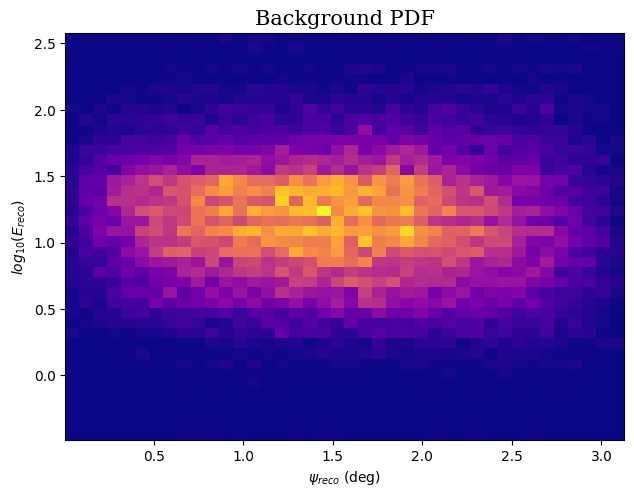

In [21]:
phy.h2(psi_scrambled, np.log10(E_reco_oversample), bins =[40,40]).plot("image", cmap="plasma", show_colorbar=False)
plt.xlabel("$\psi_{reco}$ (deg)")
plt.ylabel("$log_{10}(E_{reco})$")
plt.title('Background PDF', fontdict=font)